In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/capstor/scratch/cscs/ajayaraj/qtpyt-tests/strongly_correlated_open_shell/AuBDA13CH2/production_run/referee_response')

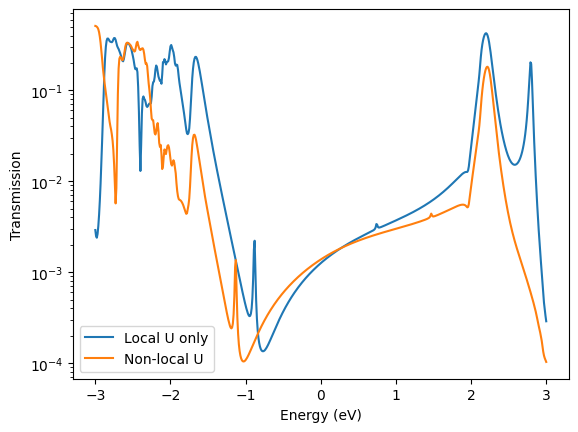

In [ ]:
E1, T_only_local_U = np.load("../output/lowdin/ed/ET_Uii.npy")
E2, T_nonlocal_U = np.load("../output/lowdin/ed/ET.npy")
plt.plot(E1, T_only_local_U, label='Local U only')
plt.plot(E2, T_nonlocal_U, label='Non-local U')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.yscale('log')
plt.legend()
plt.show()

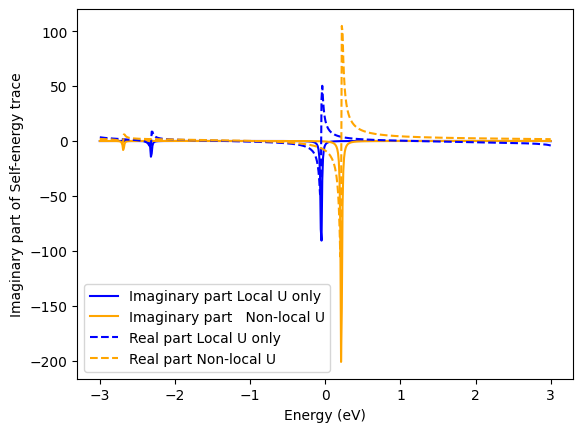

In [ ]:
se_only_local_U = np.load("../output/lowdin/ed/self_energy_with_dcc_Uii.npy")
trace_se_only_local_U = np.trace(se_only_local_U, axis1=1, axis2=2)
se_nonlocal_U = np.load("../output/lowdin/ed/self_energy_with_dcc.npy")
trace_se_nonlocal_U = np.trace(se_nonlocal_U, axis1=1, axis2=2)
plt.plot(E1, np.imag(trace_se_only_local_U), color = 'blue',label='Imaginary part Local U only')
plt.plot(E1, np.imag(trace_se_nonlocal_U), color = 'orange',label='Imaginary part   Non-local U')
plt.plot(E1, np.real(trace_se_only_local_U), color = 'blue',label='Real part Local U only', linestyle='--')
plt.plot(E1, np.real(trace_se_nonlocal_U), color = 'orange',label='Real part Non-local U', linestyle='--')
plt.xlabel('Energy (eV)')
plt.ylabel('Imaginary part of Self-energy trace')
plt.legend()
plt.show()


### Analysis using PPP formula for U

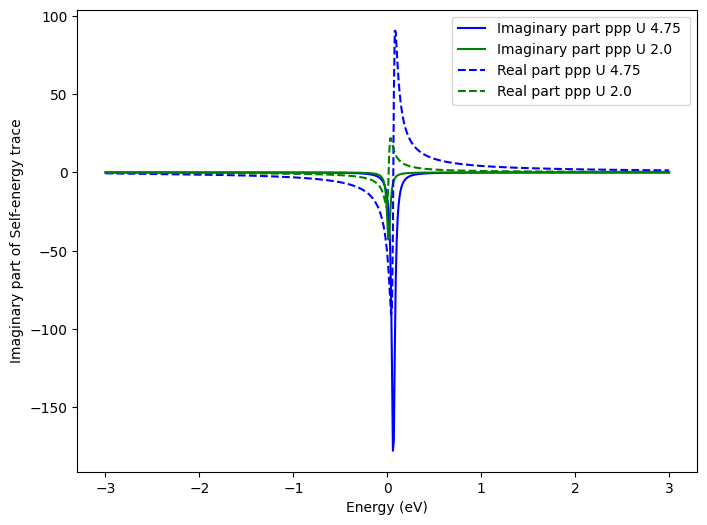

In [14]:
fig = plt.figure(figsize=(8, 6))
se_U_4 = np.load("../output/lowdin/ed/referee_response/ed_sigma_ppp.npy")
trace_U_4 = np.trace(se_U_4, axis1=1, axis2=2)
se_U_2 = np.load("../output/lowdin/ed/referee_response/ed_sigma_ppp_2.0.npy")
trace_U_2 = np.trace(se_U_2, axis1=1, axis2=2)
se_nonlocal_U = np.load("../output/lowdin/ed/self_energy_with_dcc.npy")
trace_se_nonlocal_U = np.trace(se_nonlocal_U, axis1=1, axis2=2)
plt.plot(E1, np.imag(trace_U_4), color = 'blue',label='Imaginary part ppp U 4.75 ')
plt.plot(E1, np.imag(trace_U_2), color = 'green',label='Imaginary part ppp U 2.0 ')
# plt.plot(E1, np.imag(trace_se_nonlocal_U), color = 'orange',label='Imaginary part   Non-local U')
plt.plot(E1, np.real(trace_U_4), color = 'blue',label='Real part ppp U 4.75 ', linestyle='--')
plt.plot(E1, np.real(trace_U_2), color = 'green',label='Real part ppp U 2.0 ', linestyle='--')
# plt.plot(E1, np.real(trace_se_nonlocal_U), color = 'orange',label='Real part Non-local U', linestyle='--')
plt.xlabel('Energy (eV)')
plt.ylabel('Imaginary part of Self-energy trace')
plt.legend()
plt.show()


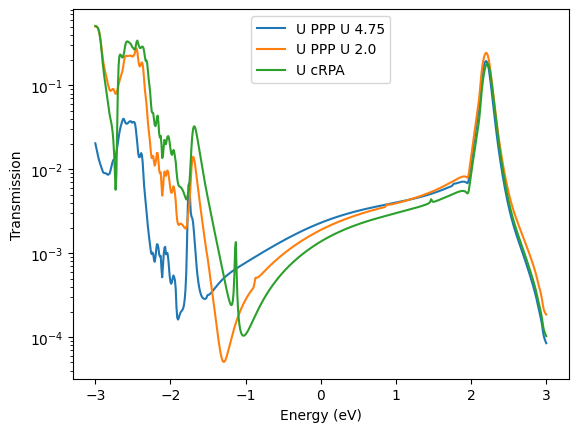

In [8]:
E,T_upp = np.load("../output/lowdin/ed/referee_response/ET_Uppp.npy")
E, T_upp_2 = np.load("../output/lowdin/ed/referee_response/ET_Uppp_2.0.npy")
plt.plot(E, T_upp, label='U PPP U 4.75')
plt.plot(E, T_upp_2, label='U PPP U 2.0')
plt.plot(E2, T_nonlocal_U, label='U cRPA')
plt.xlabel('Energy (eV)')
plt.ylabel('Transmission')
plt.yscale('log')
plt.legend()
plt.show()